<a href="https://colab.research.google.com/github/Saidani210L/Face_Emotion-Recognition/blob/main/face_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports

import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab import files

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abderraoufsaidani","key":"059abbb4dc903f5cfcb20acb915bf92e"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           2556        227  1.0              
thedevastator/global-video-game-sales-and-ratings      Global Video Game Sales and Ratings          71KB  2023-12-20 06:46:32           1351         29  0.9411765        
muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data               763KB  2023-11-21 17:56:32          11527        192  1.0              
thedevastator/netflix-imdb-scores                      Netflix IMDB Scores                         699KB  2023-12-03 14:10:34           5016     

In [6]:
!kaggle datasets download -d msambare/fer2013

 78% 47.0M/60.3M [00:00<00:00, 152MB/s]
100% 60.3M/60.3M [00:00<00:00, 152MB/s]


In [7]:
import zipfile

! mkdir data
! unzip fer2013.zip -d data

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data/train/sad/Training_65242339.jpg  
  inflating: data/train/sad/Training_65267116.jpg  
  inflating: data/train/sad/Training_65275626.jpg  
  inflating: data/train/sad/Training_6529266.jpg  
  inflating: data/train/sad/Training_65329617.jpg  
  inflating: data/train/sad/Training_65338712.jpg  
  inflating: data/train/sad/Training_65338797.jpg  
  inflating: data/train/sad/Training_65387162.jpg  
  inflating: data/train/sad/Training_65404494.jpg  
  inflating: data/train/sad/Training_65426218.jpg  
  inflating: data/train/sad/Training_65430136.jpg  
  inflating: data/train/sad/Training_65437377.jpg  
  inflating: data/train/sad/Training_6545735.jpg  
  inflating: data/train/sad/Training_65463385.jpg  
  inflating: data/train/sad/Training_65473985.jpg  
  inflating: data/train/sad/Training_65502829.jpg  
  inflating: data/train/sad/Training_65505359.jpg  
  inflating: data/train/sad/Training_655

In [8]:
import os

TRAIN_DIR = os.path.join("data", "train")
TEST_DIR = os.path.join("data", "test")
BATCH_SIZE=32

In [9]:
# data = tf.keras.utils.image_dataset_from_directory(train_path, image_size=(224, 224))

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (224, 224),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'sparse',
                                                 subset='training',
                                                 shuffle=True)

validation_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (224, 224),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'sparse',
                                                 subset='validation',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (224, 224),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'sparse',
                                            shuffle=True)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
# 0="angry", 1="disgust", 2="fear", 3="happy", 4="neutral", 5="sad", 6="surprise"

CLASSES = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

In [ ]:
# data_iterator = data.as_numpy_iterator()

In [11]:
# batch = data_iterator.next()

batch = next(training_set)
batch[1]

array([6., 0., 5., 2., 4., 3., 3., 3., 6., 4., 3., 0., 2., 5., 0., 2., 6.,
       3., 5., 5., 4., 4., 6., 4., 2., 0., 4., 2., 3., 5., 3., 5.],
      dtype=float32)

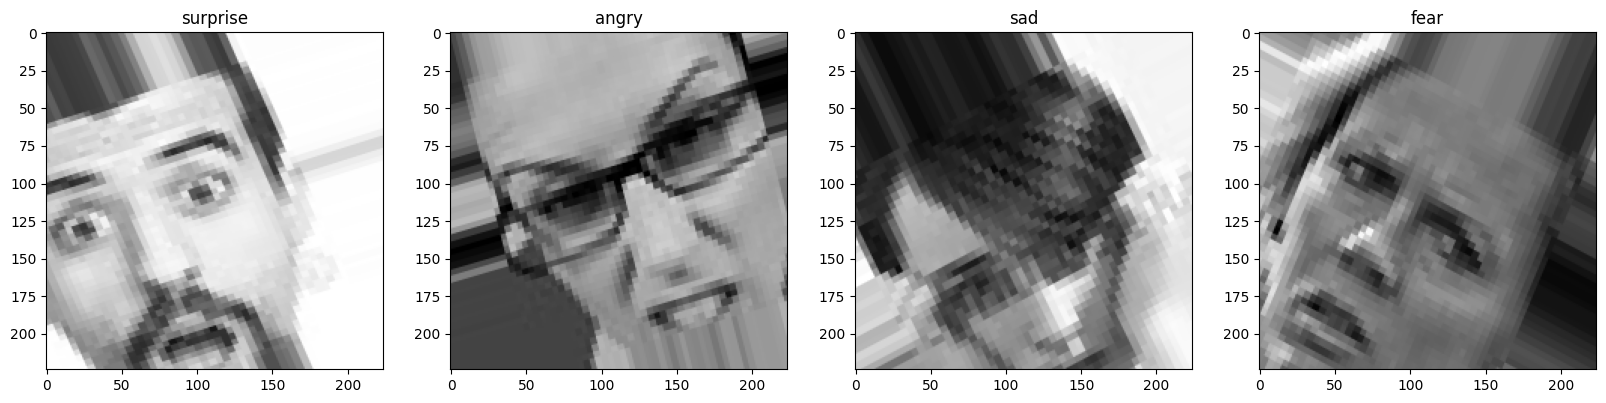

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(CLASSES[int(batch[1][idx])])

In [ ]:
# data = data.map(lambda x,y: (x/255, y))

In [ ]:
# data.as_numpy_iterator().next()

In [ ]:
# train_size = int(len(data)*.8)
# val_size = int(len(data)*.2)

In [ ]:
# train = data.take(train_size)
# val = data.skip(train_size).take(val_size)

In [ ]:
# train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D

In [15]:
base_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(224,224,3), weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# base_model.trainable = False

for layer in base_model.layers:
    layer.trainable = True

In [16]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
base_input = base_model.layers[0].input
base_output = base_model.layers[-2].output

In [ ]:
final_output = tf.keras.layers.Dense(128, activation="relu")(base_output)
final_output = tf.keras.layers.Dense(64, activation="relu")(final_output)
final_output = tf.keras.layers.Dense(7, activation="softmax")(final_output)



In [17]:
new_model = tf.keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024,activation='relu'),
    Dense(1024,activation='relu'),
    Dense(512,activation='relu'),
    Dense(7,activation='softmax')
])


In [ ]:
new_model = tf.keras.Model(inputs=base_input, outputs=final_output)

In [18]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 7)                 3

In [19]:
logdir='logs'

In [20]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

checkpoint = ModelCheckpoint(
                             'emotion_face_mobilNet.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(
                          monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)

callbacks = [earlystop,checkpoint,learning_rate_reduction,tensorboard_callback]

In [22]:
new_model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
hist = new_model.fit(training_set, epochs=25, validation_data=validation_set, callbacks=callbacks)

Epoch 1/25
 15/718 [..............................] - ETA: 1:24:45 - loss: 1.9692 - accuracy: 0.2271

KeyboardInterrupt: ignored

In [ ]:
# Initialising the CNN
classifier = tf.keras.Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 7, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

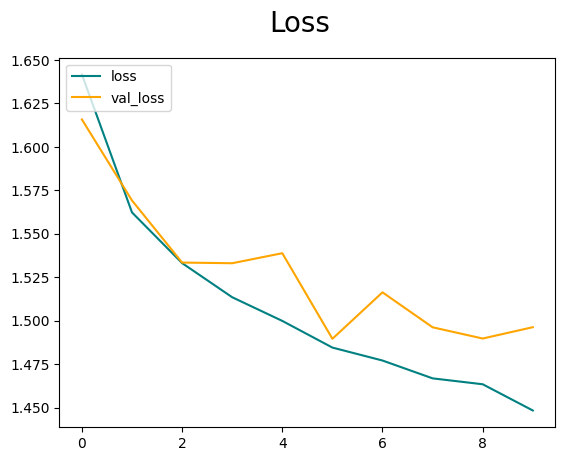

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

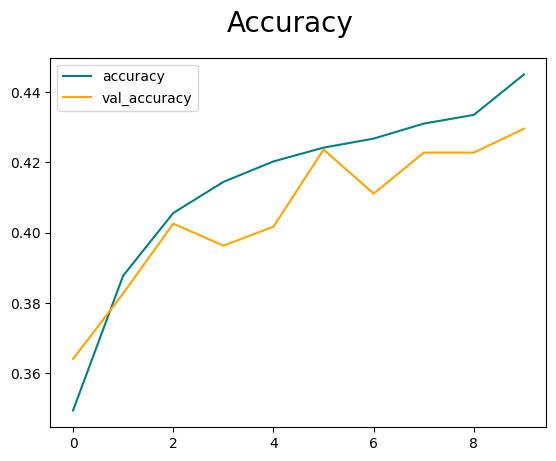

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()